# Emerging Technologies Project 
---
## Hong Wei Phang -- G00388774

# Section 1: Introduction to Deutsch's Algorithm

Quantum computing represents a revolutionary approach to computation, harnessing quantum mechanics to achieve processing power beyond the capabilities of classical computers. A quantum bit, or qubit, is the fundamental unit of quantum information, analogous to a bit in classical computing. Unlike bits, which are binary, qubits can exist in multiple states simultaneously due to the principle of superposition.

In 1985, David Deutsch proposed what is now known as Deutsch's Algorithm, which addressed a simple problem through a quantum lens: determining if a hidden binary function is constant (the same output for all inputs) or balanced (outputs half 0s and half 1s). Classical logic dictates that two queries to the function are needed to determine this, but Deutsch's Algorithm could ascertain the answer with a single quantum operation.

This algorithm not only marked the inception of quantum algorithms but also laid the groundwork for quantum computational theory, influencing the development of more sophisticated algorithms. It uses quantum gates to manipulate qubits, exploiting superposition and interference, and culminates in a measurement that, counterintuitively, provides complete information about the global nature of the function.

In this section, we will explore the origins and implications of Deutsch's Algorithm, understand the fundamental quantum computing concepts it employs, and prepare to delve into its implementation with Qiskit.




# Section 2: Detailed Explanation of Deutsch's Algorithm

Deutsch's Algorithm solves a specific problem in quantum computation known as the Deutsch problem. It determines if a given quantum function, encoded as an oracle, is constant or balanced with only one query. This contrasts with the classical approach, which requires checking both possible inputs.

The algorithm uses the following steps:

1. Initialize the qubits: Start with two qubits, the first in state `|0⟩` and the second in state `|1⟩`.

2. Apply Hadamard gates: Apply a Hadamard gate to both qubits to create a superposition of states.

3. Apply the oracle: Introduce the quantum oracle, which performs a specific unitary transformation based on the function being evaluated.

4. Apply Hadamard gate again: Apply another Hadamard gate to the first qubit, which leads to interference patterns that are key to the algorithm.

5. Measure the first qubit: The measurement will collapse the first qubit into one of the basis states, `|0⟩` or `|1⟩`, indicating whether the function is constant or balanced.

The quantum oracle is the heart of the algorithm. It is a black box that performs a specific transformation on the qubits. For a constant function, it leaves them unchanged or flips them both. For a balanced function, it flips the second qubit conditional on the first qubit being in state `|1⟩`.

Here is a table illustrating the function types and their outputs:


| Function Type    | $x=0$ | $x=1$ | 
| ---------------- | ----- | ----- |
| Constant (0)     | 0     | 0     | 
| Constant (1)     | 1     | 1     | 
| Balanced (0 ↦ 1) | 0     | 1     | 
| Balanced (1 ↦ 0) | 1     | 0     |

Below are the plot of the quantum circuit  using Qiskit's `circuit_drawer` function, which will provide a visual representation of the algorithm.

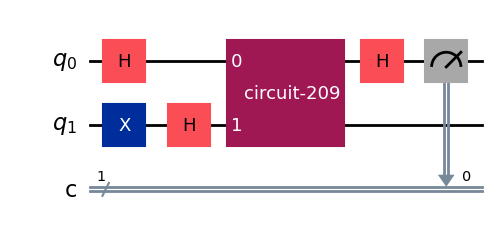

In [18]:
# Importing libraries for generating the circuits
import numpy as np
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

# Function to create a quantum circuit for Deutsch's Algorithm
def deutsch_circuit(oracle):
    qc = QuantumCircuit(2, 1)  # 2 qubits and 1 classical bit for measurement

    # Initialize the second qubit to |1>
    qc.x(1)

    # Apply Hadamard gates to both qubits
    qc.h([0, 1])

    # Apply the oracle
    qc.append(oracle, [0, 1])

    # Apply another Hadamard gate to the first qubit
    qc.h(0)

    # Measure the first qubit
    qc.measure(0, 0)

    return qc

# Define an example oracle
example_oracle = QuantumCircuit(2)
# Here you can add operations to example_oracle to represent a specific function
# For example, let's add a CNOT gate for demonstration
example_oracle.cx(0, 1)

# Create the circuit
qc = deutsch_circuit(example_oracle)

# Draw the circuit with the new default style
qc.draw(output='mpl', style='iqp')


### The explanation of the circuit

1. Qutbits Initialization: 
- There are two qubits, $q_0$ and $q_1$.
- $q_0$ is initialized to $|0\rangle$.
- $q_1$ is initialized to $|1\rangle$ using the `X` gate (also known as NOT gate).This is because Deutsch's algorithm requires the second qubit to be in state $|1\rangle$.

2. Hadamard Gate Application:
- Hadamard `(H)` gates are applied to both qubits. The Hadamard gate transforms the qubits into a superposition of states.
- For $q_0$, it changes the state from $|0\rangle$ to $\frac{(|0\rangle + |1\rangle)}{\sqrt{2}}$, creating a superposition of both computational basis states.$$H|0\rangle = \frac{(|0\rangle + |1\rangle)}{\sqrt{2}}$$ 
- For $q_1$, it transforms the state from $|1\rangle$ to $\frac{(|0\rangle - |1\rangle)}{\sqrt{2}}$,  which is a superposition with a phase difference between the states..$$H|1\rangle = \frac{(|0\rangle - |1\rangle)}{\sqrt{2}}$$

3. Oracle Application:
- The `circuit` box represents the oracle. In the context of Deutsch's Algorithm, the oracle is a black-box operation that performs a certain function on the qubits.
- The oracle is applied to both qubits. The function it performs depends on the type of function we are evaluating.
- For a constant function, the function will transform the state to return the state `0` as the output. 
- For a balanced function, the function will flip all the bits in the input to return the state `1` as the output.

4. The Second Hadamard Gate on $q_0$:
- After the oracle is applied, another Hadamard gate is applied to $q_0$. This second Hadamard gate is crucial because it interferes the two paths that the superposition has evolved into due to the oracle's operation.

5. Measurement:
- The final step is to measure the qubits. The measurement will collapse the qubits into one of the basis states, $|0\rangle$ or $|1\rangle$.
- The measurement of $q_0$ will return the state $|0\rangle$ if the function is constant, and $|1\rangle$ if the function is balanced.

In the simulation section, we will see how these theoretical steps translate into a quantum circuit and how the measurement confirms the nature of the oracle's function.



# Section 3: Implementation and Simulation of Deutsch's Algorithm

In this section, we implement Deutsch's Algorithm using Qiskit, a framework for quantum computing. We'll create a quantum circuit that represents the algorithm, define both constant and balanced oracles, and then simulate the circuit to observe its behavior.

## Implementation in Qiskit

The implementation involves setting up a quantum circuit with two qubits and one classical bit. The first qubit is used to encode the input and the second qubit as an ancillary qubit. We apply Hadamard gates to both qubits to create a superposition, then apply the oracle, followed by another Hadamard gate on the first qubit. The measurement of the first qubit will reveal the nature of the oracle.

## Simulation

Using Qiskit's Aer simulator, we can test our circuit for different oracles. We expect that the measurement will collapse the first qubit into the state `|0⟩` for constant oracles and `|1⟩` for balanced oracles, demonstrating the algorithm's efficacy.

## Python Code for Deutsch's Algorithm




In [2]:
#import qiskit if not already installed
# %pip install qiskit-aer

In [3]:
# Import necessary libraries
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram


This part imports the necessary modules from Qiskit:

- `QuantumCircuit` is used to create quantum circuits.
- `Aer` is the module for simulating quantum circuits.
- `execute` is a function that runs the quantum circuit on a specified backend (like a simulator).
- `plot_histogram` is used for visualizing the measurement results.


### Defining the Deutsch's Algorithm Circuit

In [8]:
# Function to create the Deutsch's algorithm circuit
def deutsch_circuit(oracle):
    # Creating a quantum circuit with 2 qubits and 1 classical bit
    qc = QuantumCircuit(2, 1)

    # Initialize the second qubit to |1>
    qc.x(1)  

    # Apply Hadamard gates to both qubits
    qc.h([0, 1])

    # Apply the oracle
    qc.append(oracle, [0, 1])

    # Apply Hadamard gate on the first qubit
    qc.h(0)

    # Measure the first qubit
    qc.measure(0, 0)

    return qc

The `deutsch_circuit` function creates a quantum circuit for Deutsch's Algorithm:
- It uses 2 qubits and 1 classical bit. The first qubit is for querying the oracle; the second is an ancillary qubit.
- Hadamard gates create a superposition of qubit states.
- The `oracle` is a quantum circuit representing either a constant or balanced function.
- Another Hadamard gate on the first qubit and its subsequent measurement conclude the algorithm.


### Setting Up Constant and Balanced Oracles

In [9]:
# Define a constant oracle (e.g., an oracle that does nothing)
constant_oracle = QuantumCircuit(2)
# No gates added means the oracle does nothing, it's an identity operation

# Define a balanced oracle (e.g., an oracle that flips the output for one input)
balanced_oracle = QuantumCircuit(2)
# Applying a CNOT gate; if the first qubit is |1>, it will flip the second qubit
balanced_oracle.cx(0, 1)


These lines initialize circuits for the oracles:
- `constant_oracle` for a constant function.
- `balanced_oracle` for a balanced function.
- Specific gates defining these oracles should be added to these circuits.


### Simulation for Constant Oracle

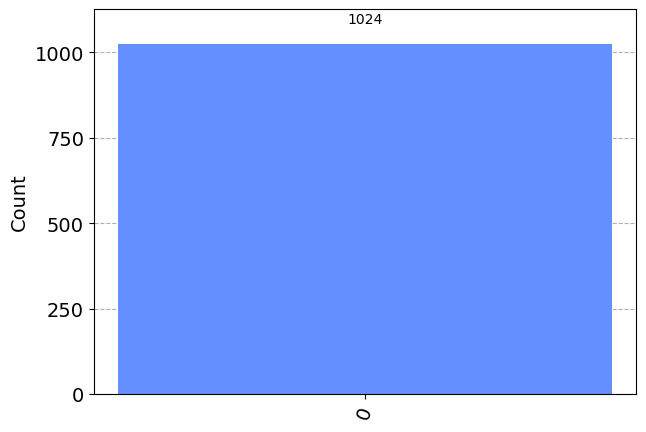

In [10]:
# Create and simulate the circuit for a constant oracle
constant_circuit = deutsch_circuit(constant_oracle)
simulator = Aer.get_backend('qasm_simulator')
result = execute(constant_circuit, simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

This code simulates Deutsch's Algorithm with the constant oracle:
- The circuit is created and executed on a simulator.
- The simulation is run multiple times (1024 shots).
- Measurement outcomes are visualized in a histogram.


We should see a histogram with all measurements resulting in `|0⟩` . This indicates that the oracle is constant, which is expected.

### Simulation for Balanced Oracle

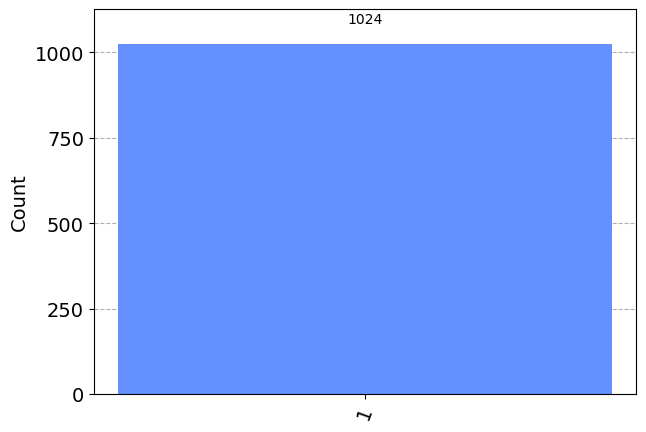

In [11]:
# Create and simulate the circuit for a balanced oracle
balanced_circuit = deutsch_circuit(balanced_oracle)
result = execute(balanced_circuit, simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

Similarly, this part simulates the algorithm with the balanced oracle:
- The process is identical to that for the constant oracle.

Given that we're seeing the second histogram with all measurements resulting in `|1⟩`, this means that our balanced oracle is correctly causing the algorithm to identify the function as balanced.

### Summary

This code implements Deutsch's Algorithm in Qiskit, demonstrating how it distinguishes between constant and balanced oracles with a single query. Histograms visually represent the output, confirming the nature of the function encoded in the oracle.




# Section 4: Analysis and Interpretation of Results

Having implemented and simulated Deutsch's Algorithm for both constant and balanced oracles, we now analyze and interpret the results to validate the algorithm's functionality.

## Analysis of Simulation Results

The key to Deutsch's Algorithm is how the quantum interference pattern, caused by the Hadamard gates and the oracle, reveals the nature of the function encoded in the oracle. For a constant oracle, regardless of its output being always 0 or always 1, the final measurement of the first qubit will be `|0⟩`. For a balanced oracle, this measurement will be `|1⟩`.

## Interpretation of the Results

In our simulations, we executed the circuit with both types of oracles and observed the measurement outcomes. The histogram plots show the distribution of these outcomes over many repetitions (shots) of the experiment.

In Deutsch's Algorithm:

- If the function encoded by the oracle is constant, the measurement of the first qubit after the algorithm is applied should always result in the state `|0⟩`.
- If the function is balanced, the measurement of the first qubit should always result in the state `|1⟩`.

These results confirm that with a single query to the oracle, Deutsch's Algorithm can successfully determine whether the function is constant or balanced, showcasing an exponential speed-up over classical deterministic algorithms.

## Practical Implications

The results from Deutsch's Algorithm demonstrate the potential of quantum computing to solve certain problems more efficiently than classical computing. This algorithm, while theoretically simple, lays the foundation for more complex quantum algorithms and highlights the unique advantages of quantum parallelism and interference.

In practical terms, these principles are the cornerstone of more advanced quantum algorithms that hold promise for significant advancements in fields such as cryptography, optimization, and simulation of quantum systems.



## References 

1. Deutsch, D. (1985). Quantum theory, the Church-Turing principle and the universal quantum computer. *Proceedings of the Royal Society of London. Series A. Mathematical and Physical Sciences*, 400(1818), 97–117. https://royalsocietypublishing.org/doi/epdf/10.1098/rspa.1985.0070
2. Nielsen, M. A., & Chuang, I. L. (2010). *Quantum Computation and Quantum Information*. Cambridge University Press.
3. Mermin, N. D. (2007). *Quantum Computer Science: An Introduction*. Cambridge University Press.
4. Jozsa, R., & Linden, N. (2003). On the role of entanglement in quantum-computational speed-up. *Proceedings of the Royal Society of London. Series A: Mathematical, Physical and Engineering Sciences*, 459(2036), 2011-2032.
5. Shor, P. W. (1997). Polynomial-Time Algorithms for Prime Factorization and Discrete Logarithms on a Quantum Computer. *SIAM Journal on Computing*, 26(5), 1484–1509.
6. Cleve, R., Ekert, A., Macchiavello, C., & Mosca, M. (1998). Quantum algorithms revisited. *Proceedings of the Royal Society of London. Series A: Mathematical, Physical and Engineering Sciences*, 454(1969), 339-354.
7. QuantumComputing(CSTPart II) Lecture7:Deutsch-Jozsaalgorithm. https://www.cl.cam.ac.uk/teaching/1920/QuantComp/Quantum_Computing_Lecture_7.pdf
8. Christophe Pere (2022). Deutsch-Jozsa, or How to Evaluate a Balanced Function. https://pere-christophe.medium.com/deutsch-jozsa-or-how-to-evaluate-a-balanced-function-b19fe0711187

# Video Learning

1. Deutsch's Algorithm: An Introduction to Quantum Computing Oracles. https://youtu.be/7MdEHsRZxvo?si=787ceGEbr9jKQr9k

---

# End of Project